# Comparison of CDT and SDT in RL

(3, 2981)


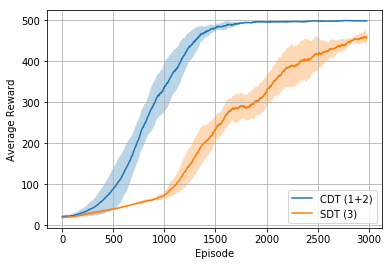

In [10]:
# -*- coding: utf-8 -*-
import torch
import torch.nn as nn
from torch.utils import data
import numpy as np
import matplotlib.pyplot as plt
import os
import csv


def smooth(y, radius=100, mode='two_sided'):
    if len(y) < 2*radius+1:
        return np.ones_like(y) * y.mean()
    elif mode == 'two_sided':
        convkernel = np.ones(2 * radius+1)
        return np.convolve(y, convkernel, mode='same') / \
               np.convolve(np.ones_like(y), convkernel, mode='same')
    elif mode == 'causal':
        convkernel = np.ones(radius)
        out = np.convolve(y, convkernel,mode='full') / \
              np.convolve(np.ones_like(y), convkernel, mode='full')
        return out[:-radius+1]


def plot_with_fill(x, data, label, color=None):
    y_m=np.mean(data, axis=0)
    y_std=np.std(data, axis=0)
    y_upper=y_m+y_std
    y_lower=y_m-y_std
    if color is not None:
        plt.fill_between(
        x, list(y_lower), list(y_upper), interpolate=True, facecolor=color, linewidth=0.0, alpha=0.3
    )   
    else:
        plt.fill_between(
        x, list(y_lower), list(y_upper), interpolate=True, linewidth=0.0, alpha=0.3
    )     
    plt.plot(x, list(y_m), color=color, label=label)


plt.figure(figsize=(6,4))

cdt_data=[]
sdt_data=[]
for i in range(4,7):
    directory ='cdt_ppo_discrete_CartPole-v1_id{}.npy'.format(i)
    r_cdt=np.load(directory)
    cdt_data.append(smooth(r_cdt))
    directory ='sdt_ppo_discrete_CartPole-v1_id{}.npy'.format(i)
    r_sdt=np.load(directory)
    sdt_data.append(smooth(r_sdt))
    
print(np.array(cdt_data).shape)
x = np.arange(np.array(cdt_data).shape[1])

plot_with_fill(x, cdt_data, label = 'CDT (1+2)')
plot_with_fill(x, sdt_data, label = 'SDT (3)')

plt.xlabel('Episode')
plt.ylabel('Average Reward')
leg= plt.legend(loc=4)
plt.grid()
plt.savefig('./cdt_sdt.png')
plt.show()


# if __name__ == '__main__':